# Heart Failure Model Training Notebook

### Import required modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

### Read Dataset

In [2]:
# Read dataset from csv
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Dataset Preview
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Dataset Structure
df.shape

(299, 13)

In [4]:
## Statistical Overview of dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Data Visualisation

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

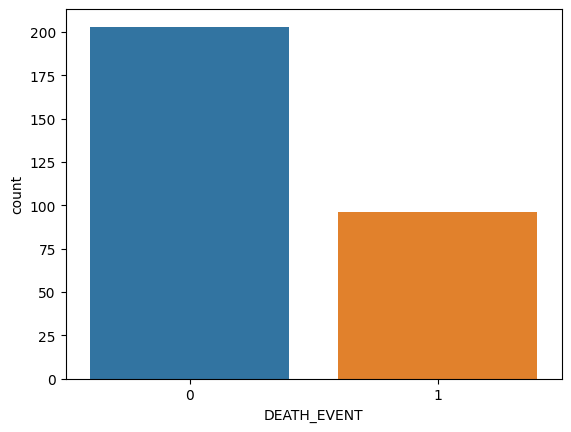

In [5]:
# Total Number of Death event due to heart failure
sns.countplot(x="DEATH_EVENT", data=df)

c:\Users\Srijan Gupta\Desktop\MediBuddy-private\API\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

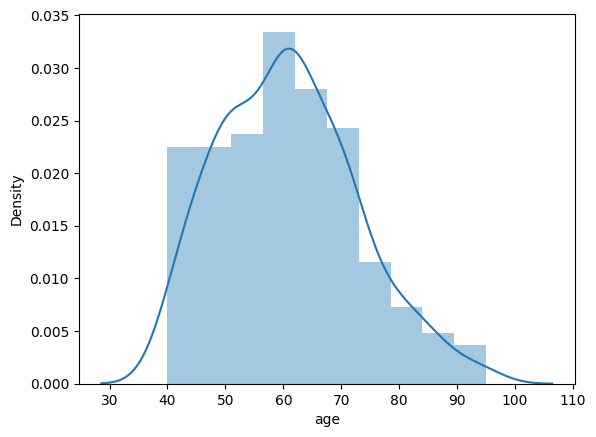

In [6]:
# Age Distribution
sns.distplot(df.age)

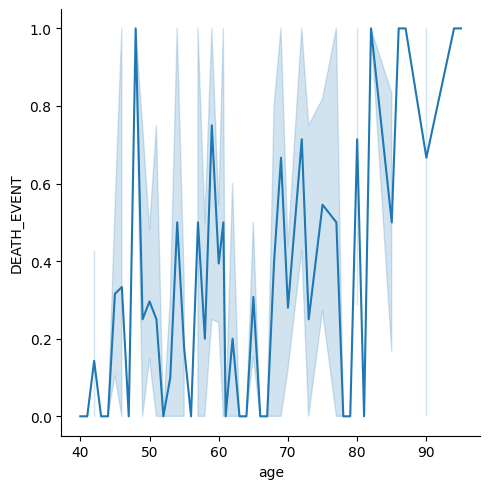

In [7]:
# Relational Plot between Death Event and Age 
sns.relplot(
    data=df, kind="line",
    x="age", y="DEATH_EVENT",
)

<AxesSubplot:>

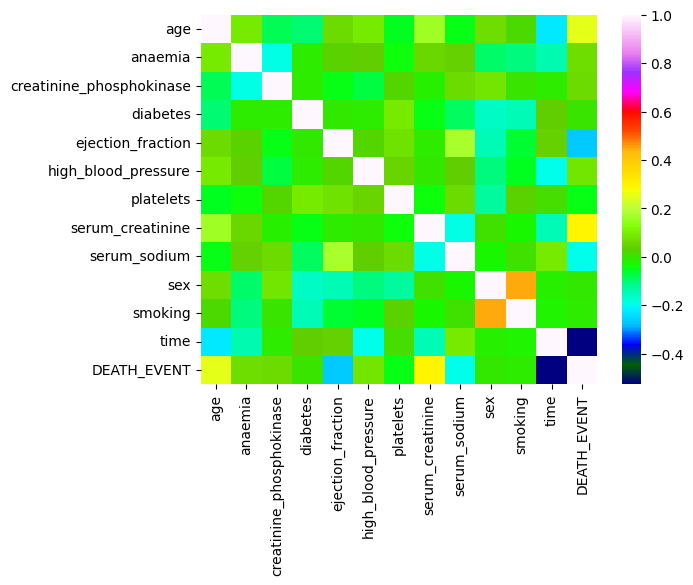

In [8]:
# Heatmap
sns.heatmap(df.corr(), cmap='gist_ncar')

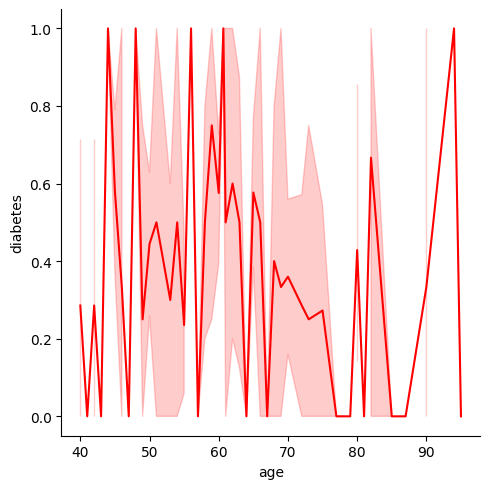

In [9]:
# Relational Plot between Diabetes and Age 
sns.relplot(kind ="line", x= "age", y = "diabetes", data = df, color="red")

<AxesSubplot:xlabel='sex', ylabel='count'>

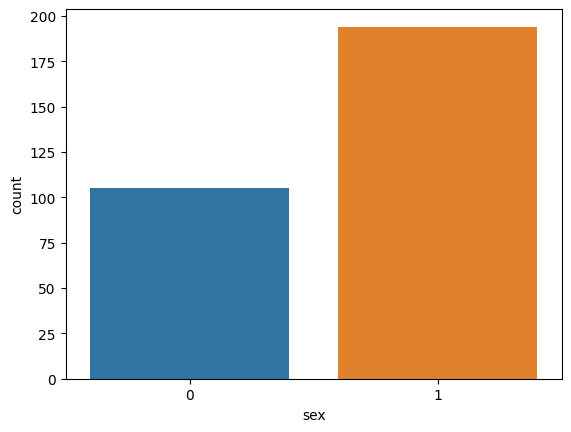

In [10]:
sns.countplot(x="sex", data=df)

### Data Pre-processing

In [11]:
# Label preprocessing
X = df.loc[:, df.columns != 'DEATH_EVENT']
y = df['DEATH_EVENT']

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

In [12]:
# Test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
print (X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(239, 12) (60, 12) (239,) (60,)


### Model Training

In [14]:
clf_LR = LogisticRegression()
clf_LR.fit(X_train,y_train)

LogisticRegression()

In [15]:
clf_LR.coef_

array([[ 1.19444587, -0.02571368,  0.60915595,  0.21908031, -2.07711698,
        -0.12618231, -0.65226324,  1.8839849 , -1.06514707, -0.13500433,
        -0.09157593, -3.43454204]])

In [16]:
clf_LR.intercept_

array([1.73654842])

### Model Prediction

In [17]:
y_test_pred = clf_LR.predict(X_test)

In [18]:
# Confusion Matrix
confusion_matrix(y_test, y_test_pred)

array([[42,  4],
       [ 4, 10]], dtype=int64)

In [19]:
# Accuracy Score
accuracy_score(y_test, y_test_pred)

0.8666666666666667

In [20]:
# ROC AUC Score
roc_auc_score(y_test, y_test_pred)

0.813664596273292

In [21]:
precision_score(y_test, y_test_pred)

0.7142857142857143

In [22]:
recall_score(y_test, y_test_pred)

0.7142857142857143

### Save Trained Model

In [23]:
filename = 'finalized_model.sav'
pk.dump(clf_LR, open(filename, 'wb'))

### Load Model

In [24]:
loaded_model = pk.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8666666666666667


In [25]:
type(X_test)

numpy.ndarray

In [26]:
X_test

array([[0.18181818, 1.        , 0.01173769, 0.        , 0.09090909,
        0.        , 0.19869075, 0.03370787, 0.74285714, 1.        ,
        0.        , 0.50533808],
       [0.09090909, 0.        , 0.07131921, 1.        , 0.62121212,
        0.        , 0.62783368, 0.05617978, 0.54285714, 0.        ,
        0.        , 0.87544484],
       [0.23636364, 1.        , 0.00867568, 0.        , 0.09090909,
        1.        , 0.47630016, 0.1011236 , 0.74285714, 0.        ,
        0.        , 0.13879004],
       [0.21818182, 0.        , 0.01390661, 0.        , 0.24242424,
        0.        , 0.23384653, 0.02247191, 0.65714286, 1.        ,
        1.        , 0.38434164],
       [0.45454545, 1.        , 0.01428936, 0.        , 0.31818182,
        1.        , 0.32112983, 0.03370787, 0.6       , 1.        ,
        0.        , 0.67615658],
       [0.45454545, 0.        , 0.01837203, 0.        , 0.24242424,
        0.        , 0.28354952, 0.03370787, 0.71428571, 0.        ,
        0.        ,

In [27]:
loadedModel = pk.load(open('finalized_model.sav', 'rb'))
result = loadedModel.predict(X_test)
print(result)

[0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0]


In [28]:
X_test.shape

(60, 12)

In [29]:
log_reg = LogisticRegression()
pk.dump(log_reg,open('modelhrt.pkl','wb'))
model=pk.load(open('modelhrt.pkl','rb'))